In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('AAPL.csv')

In [4]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-27,32.584999,33.064999,32.512501,33.009998,30.218685,183332800
1,2015-05-28,32.965000,32.987499,32.775002,32.945000,30.159180,122933200
2,2015-05-29,32.807499,32.862499,32.474998,32.570000,29.815893,203538000
3,2015-06-01,32.570000,32.847500,32.512501,32.634998,29.875401,128451200
4,2015-06-02,32.465000,32.665001,32.330002,32.490002,29.742664,134670400


In [5]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2020-05-19,78.757500,79.629997,78.252502,78.285004,77.761040,101729600
1255,2020-05-20,79.169998,79.879997,79.129997,79.807503,79.273354,111504800
1256,2020-05-21,79.665001,80.222504,78.967499,79.212502,78.682327,102688800
1257,2020-05-22,78.942497,79.807503,78.837502,79.722504,79.188927,81803200
1258,2020-05-26,80.875000,81.059998,79.125000,79.182503,78.652542,125522000


In [6]:
df.size

8813

In [7]:
df1 = df.reset_index()['Close']

In [8]:
df1.shape

(1259,)

In [9]:
df1

0       33.009998
1       32.945000
2       32.570000
3       32.634998
4       32.490002
          ...    
1254    78.285004
1255    79.807503
1256    79.212502
1257    79.722504
1258    79.182503
Name: Close, Length: 1259, dtype: float64

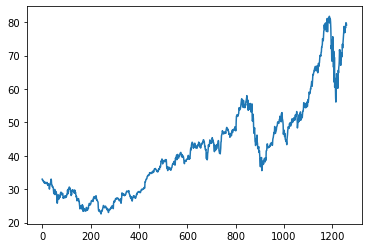

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
df1 = sc.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1.shape

(1259, 1)

In [13]:
train_size = int(len(df1)*0.65)
test_size = len(df1)-train_size
train_data,test_data = df1[0:train_size,:],df1[train_size :len(df1),:1]

In [14]:
train_size, test_size

(818, 441)

In [15]:
def dataset(dataset, time_set =1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_set-1):
        a = dataset[i:(i+time_step-1), 0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
time_step = 100
X_train, y_train = dataset(train_data, time_step)
X_test, y_test = dataset(test_data, time_step)

In [17]:
print(X_train)

[[0.17605334 0.17495568 0.16862282 ... 0.08975767 0.09055984 0.08388923]
 [0.17495568 0.16862282 0.16972048 ... 0.09055984 0.08388923 0.09085537]
 [0.16862282 0.16972048 0.16727185 ... 0.08388923 0.09085537 0.08739341]
 ...
 [0.32930843 0.32145569 0.32694418 ... 0.50042216 0.50413745 0.5062062 ]
 [0.32145569 0.32694418 0.32230005 ... 0.50413745 0.5062062  0.51920968]
 [0.32694418 0.32230005 0.32951954 ... 0.5062062  0.51920968 0.53719495]]


In [18]:
X_test.shape

(340, 99)

In [19]:
y_test.shape

(340,)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [22]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
import tensorflow as tf

In [25]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100 , batch_size = 64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 10s 273ms/step - loss: 0.0154 - val_loss: 0.0795
Epoch 2/100
12/12 [==============================] - 2s 126ms/step - loss: 0.0042 - val_loss: 0.0069
Epoch 3/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0012 - val_loss: 0.0070
Epoch 4/100
12/12 [==============================] - 1s 120ms/step - loss: 8.9757e-04 - val_loss: 0.0045
Epoch 5/100
12/12 [==============================] - 1s 122ms/step - loss: 7.6792e-04 - val_loss: 0.0048
Epoch 6/100
12/12 [==============================] - 1s 120ms/step - loss: 7.1920e-04 - val_loss: 0.0048
Epoch 7/100
12/12 [==============================] - 1s 122ms/step - loss: 7.2213e-04 - val_loss: 0.0050
Epoch 8/100
12/12 [==============================] - 1s 123ms/step - loss: 6.9554e-04 - val_loss: 0.0045
Epoch 9/100
12/12 [==============================] - 1s 122ms/step - loss: 7.1966e-04 - val_loss: 0.0043
Epoch 10/100
12/12 [==============================] - 1s 121ms/ste

In [26]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [27]:
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [28]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

35.41619167601561

In [29]:
math.sqrt(mean_squared_error(y_test,test_predict))

59.208459592832305

In [30]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [31]:
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

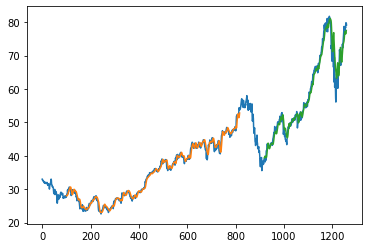

In [32]:
plt.plot(sc.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
test_data.shape

(441, 1)

In [34]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.8866418889374725,
 0.8743138647765689,
 0.884319757877581,
 0.8783669929330746,
 0.898632076424414,
 0.9258211314145988,
 0.9287763959283022,
 0.9567676293663678,
 0.9386978847455618,
 0.9330405516817999,
 0.949505956294455,
 0.9642404820237787,
 0.9551211547667884,
 0.959891921986529,
 0.966351433498172,
 0.9624672152348415,
 0.9229502711846476,
 0.9598496691818172,
 0.9879252900160234,
 0.985940995630094,
 0.9253145199483563,
 0.921725885554276,
 0.9647470934900213,
 0.9757240580444779,
 0.9915983286938559,
 0.9697289051943656,
 0.9761461470136856,
 0.9679556384054282,
 0.9999999999999998,
 0.9901628985788804,
 0.9905007183652303,
 0.9653803451571157,
 0.9848855198928974,
 0.9708687683277026,
 0.940259971949001,
 0.8774802919881586,
 0.8348390553178042,
 0.8541331686813698,
 0.7733681483834738,
 0.7726926270240562,
 0.880140107733506,
 0.8400742994123584,
 0.8967321694346249,
 0.8552731669156011,
 0.8388499137819865,
 0.7423372630355642,
 0.8232710750133527,
 0.7814319999032675,
 

In [37]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.95250016]
101
1 day input [0.87431386 0.88431976 0.87836699 0.89863208 0.92582113 0.9287764
 0.95676763 0.93869788 0.93304055 0.94950596 0.96424048 0.95512115
 0.95989192 0.96635143 0.96246722 0.92295027 0.95984967 0.98792529
 0.985941   0.92531452 0.92172589 0.96474709 0.97572406 0.99159833
 0.96972891 0.97614615 0.96795564 1.         0.9901629  0.99050072
 0.96538035 0.98488552 0.97086877 0.94025997 0.87748029 0.83483906
 0.85413317 0.77336815 0.77269263 0.88014011 0.8400743  0.89673217
 0.85527317 0.83884991 0.74233726 0.82327108 0.781432   0.66659626
 0.79215567 0.64118045 0.68614368 0.6600101  0.65203071 0.58642235
 0.56586165 0.66089672 0.65515493 0.70970192 0.66452756 0.69437638
 0.69218097 0.63569196 0.65266396 0.63780291 0.72671617 0.71388155
 0.74191506 0.75002104 0.77222829 0.8304905  0.81942913 0.82897068
 0.81254741 0.78776485 0.75162538 0.78426074 0.77974327 0.81326518
 0.81410961 0.79473098 0.83336149 0.85898834 0.83901882 0.85628639
 0.87486273 0.887824   0.90095407 

 0.9372018  0.93519032 0.93428379 0.93447322]
9 day output [[0.9356708]]
10 day input [0.94950596 0.96424048 0.95512115 0.95989192 0.96635143 0.96246722
 0.92295027 0.95984967 0.98792529 0.985941   0.92531452 0.92172589
 0.96474709 0.97572406 0.99159833 0.96972891 0.97614615 0.96795564
 1.         0.9901629  0.99050072 0.96538035 0.98488552 0.97086877
 0.94025997 0.87748029 0.83483906 0.85413317 0.77336815 0.77269263
 0.88014011 0.8400743  0.89673217 0.85527317 0.83884991 0.74233726
 0.82327108 0.781432   0.66659626 0.79215567 0.64118045 0.68614368
 0.6600101  0.65203071 0.58642235 0.56586165 0.66089672 0.65515493
 0.70970192 0.66452756 0.69437638 0.69218097 0.63569196 0.65266396
 0.63780291 0.72671617 0.71388155 0.74191506 0.75002104 0.77222829
 0.8304905  0.81942913 0.82897068 0.81254741 0.78776485 0.75162538
 0.78426074 0.77974327 0.81326518 0.81410961 0.79473098 0.83336149
 0.85898834 0.83901882 0.85628639 0.87486273 0.887824   0.90095407
 0.92793208 0.94853499 0.93333612 0.9174617

20 day output [[0.96893984]]
21 day input [0.92172589 0.96474709 0.97572406 0.99159833 0.96972891 0.97614615
 0.96795564 1.         0.9901629  0.99050072 0.96538035 0.98488552
 0.97086877 0.94025997 0.87748029 0.83483906 0.85413317 0.77336815
 0.77269263 0.88014011 0.8400743  0.89673217 0.85527317 0.83884991
 0.74233726 0.82327108 0.781432   0.66659626 0.79215567 0.64118045
 0.68614368 0.6600101  0.65203071 0.58642235 0.56586165 0.66089672
 0.65515493 0.70970192 0.66452756 0.69437638 0.69218097 0.63569196
 0.65266396 0.63780291 0.72671617 0.71388155 0.74191506 0.75002104
 0.77222829 0.8304905  0.81942913 0.82897068 0.81254741 0.78776485
 0.75162538 0.78426074 0.77974327 0.81326518 0.81410961 0.79473098
 0.83336149 0.85898834 0.83901882 0.85628639 0.87486273 0.887824
 0.90095407 0.92793208 0.94853499 0.93333612 0.91746171 0.92544118
 0.91771503 0.94832382 0.94064006 0.96635143 0.95630329 0.964916
 0.95579668 0.95250016 0.95150912 0.948107   0.9440251  0.94022638
 0.9372018  0.93519032 0

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
len(df1)

1259

In [40]:
len(lst_output)

30

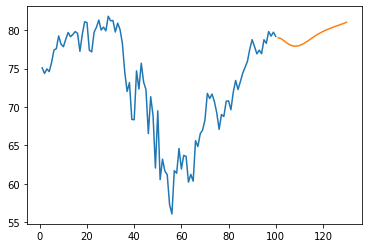

In [41]:
plt.plot(day_new,sc.inverse_transform(df1[1159:]))
plt.plot(day_pred,sc.inverse_transform(lst_output))

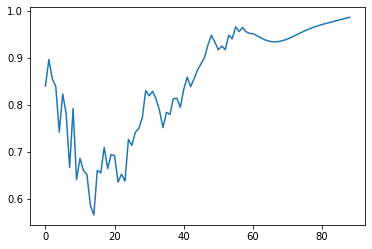

In [42]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [43]:
df3=sc.inverse_transform(df3).tolist()

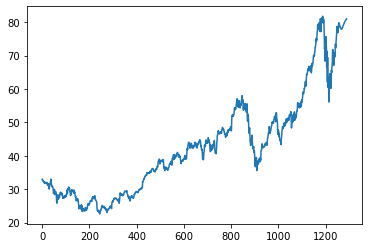

In [44]:
plt.plot(df3)

In [45]:
model.save("predict_model.h5")

In [ ]:
Create a model that reliably classifies traffic signs with convoluational neural network withtest set accuracy of 97.92%